## Importing the relevant packages

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2 
from math import sqrt
import seaborn as sns
sns.set()

## Importing the Data and Pre-processing 

In [2]:
url = './ignore/S3/L11/Index2018.csv'
raw_csv_data = pd.read_csv(url) 
df=raw_csv_data.copy()
df.date = pd.to_datetime(df.date, dayfirst = True)
df.set_index("date", inplace=True)
df=df.asfreq('b')
df=df.fillna(method='ffill')

In [3]:
df['market_value']=df.ftse

In [4]:
#del df['spx']
#del df['dax']
#del df['ftse']
#del df['nikkei']
size = int(len(df)*0.8)
df_train, df_test = df.iloc[:size], df.iloc[size:]

In [5]:
# import warnings
# warnings.filterwarnings("ignore")

## The LLR Test

In [6]:
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.fit(start_ar_lags = 11).llf
    L2 = mod_2.fit(start_ar_lags = 11).llf
    LR = (2*(L2-L1))    
    p = chi2.sf(LR, DF).round(3)
    return p

## Creating Returns

In [7]:
df_train['returns'] = df_train.market_value.pct_change(1)*100

/var/folders/2h/c7dkm6rj2w318lkvfrnrk2c00000gn/T/ipykernel_40428/3020228530.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['returns'] = df_train.market_value.pct_change(1)*100


## ARIMA(1,1,1)

In [12]:
price_arima_111 = ARIMA(df_train['market_value'], order=(1,1,1))
results_price_arima_111 = price_arima_111.fit()
print(results_price_arima_111.summary())

/Users/tim/miniforge3/envs/tf_m1/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/tim/miniforge3/envs/tf_m1/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -27604.005
Date:                Wed, 04 Jan 2023   AIC                          55214.010
Time:                        20:02:14   BIC                          55233.574
Sample:                    01-07-1994   HQIC                         55220.866
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7459      0.059     12.654      0.000       0.630       0.861
ma.L1         -0.7919      0.053    -14.925      0.000      -0.896      -0.688
sigma2      3498.7412     40.932     85.477      0.0

## Residuals of the ARIMA(1,1,1)

(-500.0, 500.0)

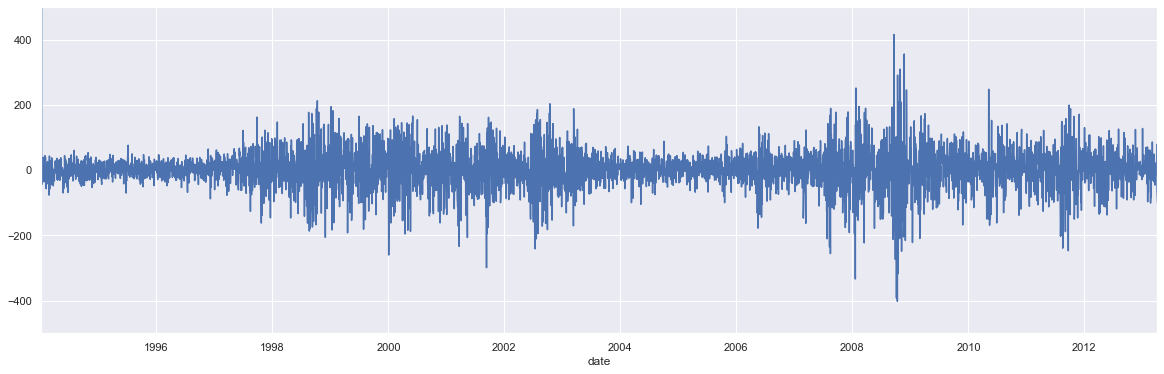

In [16]:
results_price_arima_111.resid.plot(figsize=(20, 6))
plt.ylim(-500, 500)

(-0.1, 0.1)

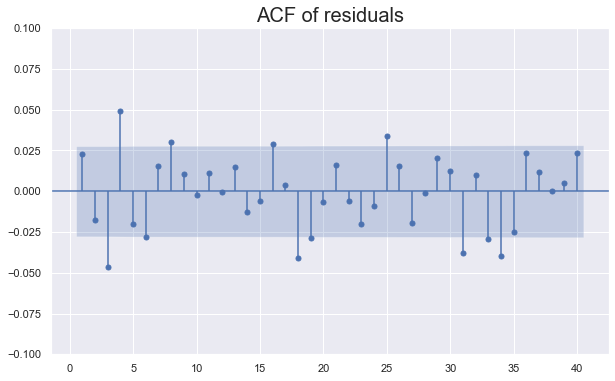

In [24]:
fig, ax = plt.subplots(figsize=(10,6))
sgt.plot_acf(results_price_arima_111.resid[1:], lags=40, zero=False, ax=ax)
plt.title("ACF of residuals", size=20)
plt.ylim(-0.1, 0.1)

## Higher-Lag ARIMA Models

    ARIMA(1,1,2), ARIMA(1,1,3), ARIMA(2,1,1), ARIMA(3,1,1), ARIMA(3,1,2)

In [25]:
price_arima_112 = ARIMA(df_train['market_value'], order=(1,1,2))
results_price_arima_112 = price_arima_112.fit()

In [26]:
price_arima_113 = ARIMA(df_train['market_value'], order=(1,1,3))
results_price_arima_113 = price_arima_113.fit()

In [27]:
price_arima_211 = ARIMA(df_train['market_value'], order=(2,1,1))
results_price_arima_211 = price_arima_211.fit()

/Users/tim/miniforge3/envs/tf_m1/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/tim/miniforge3/envs/tf_m1/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [29]:
price_arima_311 = ARIMA(df_train['market_value'], order=(3,1,1))
results_price_arima_311 = price_arima_311.fit()

In [30]:
price_arima_312 = ARIMA(df_train['market_value'], order=(3,1,2))
results_price_arima_312 = price_arima_312.fit()

In [39]:
print(f"ARIMA(1,1,1) {results_price_arima_111.llf}, {results_price_arima_111.aic}")
print(f"ARIMA(1,1,2) {results_price_arima_112.llf}, {results_price_arima_112.aic}")
print(f"ARIMA(1,1,3) {results_price_arima_113.llf}, {results_price_arima_113.aic}, best model")
print(f"ARIMA(2,1,1) {results_price_arima_211.llf}, {results_price_arima_211.aic}")
print(f"ARIMA(3,1,1) {results_price_arima_311.llf}, {results_price_arima_311.aic}")
print(f"ARIMA(3,1,2) {results_price_arima_312.llf}, {results_price_arima_312.aic}")

ARIMA(1,1,1) -27604.00510530288, 55214.01021060576
ARIMA(1,1,2) -27600.407632540606, 55208.81526508121
ARIMA(1,1,3) -27590.72348194477, 55191.44696388954, best model
ARIMA(2,1,1) -27600.13055105199, 55208.26110210398
ARIMA(3,1,1) -27592.336116474555, 55194.67223294911
ARIMA(3,1,2) -27590.920318067627, 55193.84063613525


(-0.1, 0.1)

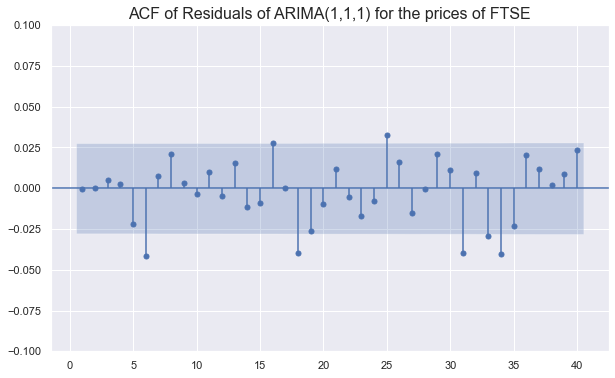

In [38]:
fig, ax = plt.subplots(figsize=(10,6))
sgt.plot_acf(results_price_arima_113.resid[1:], lags=40, zero=False, ax=ax)
plt.title("ACF of Residuals of ARIMA(1,1,1) for the prices of FTSE", size=16)
plt.ylim(-0.1, 0.1)

In [40]:
price_arima_511 = ARIMA(df_train['market_value'], order=(5,1,1))
results_price_arima_511 = price_arima_511.fit()
price_arima_613 = ARIMA(df_train['market_value'], order=(6,1,3))
results_price_arima_613 = price_arima_613.fit()

In [41]:
print(f"ARIMA(1,1,3) {results_price_arima_113.llf}, {results_price_arima_113.aic}")
print(f"ARIMA(5,1,1) {results_price_arima_511.llf}, {results_price_arima_511.aic}")
print(f"ARIMA(6,1,3) {results_price_arima_613.llf}, {results_price_arima_613.aic}")

ARIMA(1,1,3) -27590.72348194477, 55191.44696388954, best model
ARIMA(5,1,1) -27586.844609581243, 55187.68921916249
ARIMA(6,1,3) -27583.858499814625, 55187.71699962925


## Models with Higher Levels of Integration

## ARIMAX 

## SARIMAX